In [60]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from pecab import PeCab
from konlpy.tag import Okt
import matplotlib.pyplot as plt
from tqdm import tqdm

In [9]:
# df.to_csv("230815-MaplyStory-Noun.csv", index=False)
df = pd.read_csv("230815-MaplyStory-Noun.csv")
print(df.shape)
df.head()

(31347, 6)


,URL,Date,Reaction,std_dt,Length,Reaction_noun
0,https://www.inven.co.kr/board/maple/5974/2150813,2023-08-01 00:00,익몬 파티짜면 좀 미안하네 다 받아서 갔다가 극딜인가 까지 가서 고통받은 기억 이...,2023-08-01,94,"['파티', '미안', '극', '딜', '까지', '고통', '기억', '이후',..."
1,https://www.inven.co.kr/board/maple/5974/2150814,2023-08-01 00:00,걍 중나생문 이새끼가 개새끼임 스타포스작윗잠아랫잠추옵이게 다 고려되니까 템값이 비...,2023-08-01,77,"['중', '생문', '새끼', '개새끼', '스타', '포스', '잠아', '랫'..."
2,https://www.inven.co.kr/board/maple/5974/2150815,2023-08-01 00:00,호호호호 똥글 이나 보세요 밥련드라,2023-08-01,19,"['똥', '글', '밥', '련']"
3,https://www.inven.co.kr/board/maple/5974/2150816,2023-08-01 00:00,스토리 칼로스 뭔데 이리 쎄냐 당연히 스토리니까 자빱이겠지하고 사냥셋팅 그대로 갔는...,2023-08-01,103,"['스토리', '칼로스', '뭔데', '스토리', '사냥', '셋', '극', '딜..."
4,https://www.inven.co.kr/board/maple/5974/2150817,2023-08-01 00:00,솔직히 가장 만렙 빠르게 찍을 것 같은 녀석 주스만 마시고 은 족히 넘겼을 녀석,2023-08-01,44,"['만렙', '것', '녀석', '주스', '녀석']"


In [10]:
# Reaction Noun 컬럼 삭제
df.drop('Reaction_noun', axis=1, inplace=True)

In [11]:
df['Reaction'] = df['Reaction'].str.replace('[^가-힣 ]', '')
df.head()

,URL,Date,Reaction,std_dt,Length
0,https://www.inven.co.kr/board/maple/5974/2150813,2023-08-01 00:00,익몬 파티짜면 좀 미안하네 다 받아서 갔다가 극딜인가 까지 가서 고통받은 기억 이...,2023-08-01,94
1,https://www.inven.co.kr/board/maple/5974/2150814,2023-08-01 00:00,걍 중나생문 이새끼가 개새끼임 스타포스작윗잠아랫잠추옵이게 다 고려되니까 템값이 비...,2023-08-01,77
2,https://www.inven.co.kr/board/maple/5974/2150815,2023-08-01 00:00,호호호호 똥글 이나 보세요 밥련드라,2023-08-01,19
3,https://www.inven.co.kr/board/maple/5974/2150816,2023-08-01 00:00,스토리 칼로스 뭔데 이리 쎄냐 당연히 스토리니까 자빱이겠지하고 사냥셋팅 그대로 갔는...,2023-08-01,103
4,https://www.inven.co.kr/board/maple/5974/2150817,2023-08-01 00:00,솔직히 가장 만렙 빠르게 찍을 것 같은 녀석 주스만 마시고 은 족히 넘겼을 녀석,2023-08-01,44


In [12]:
df['Length'] = df['Reaction'].str.len()
df = df[df['Length'] > 1]

In [15]:
okt = Okt()

In [19]:
okt.pos("히어로들이 세상에 존재하지 않는다는 사실을 깨달은 것은 상당히 시간이 지난뒤의 일이었다.")

[('히어로', 'Noun'),
 ('들', 'Suffix'),
 ('이', 'Josa'),
 ('세상', 'Noun'),
 ('에', 'Josa'),
 ('존재', 'Noun'),
 ('하지', 'Verb'),
 ('않는다는', 'Verb'),
 ('사실', 'Noun'),
 ('을', 'Josa'),
 ('깨달', 'Noun'),
 ('은', 'Josa'),
 ('것', 'Noun'),
 ('은', 'Josa'),
 ('상당히', 'Adjective'),
 ('시간', 'Noun'),
 ('이', 'Josa'),
 ('지난', 'Modifier'),
 ('뒤', 'Noun'),
 ('의', 'Josa'),
 ('일', 'Noun'),
 ('이었다', 'Verb'),
 ('.', 'Punctuation')]

In [49]:
#okt.pos에서 Verb만 추출해서 List로 변환하는 함수 
def cleanText(text,pos=['Verb']):
    pos = okt.pos(text,norm = True, stem = False)
    # tag가 verb이면, 뛰어쓰기로 하나의 Text로 연결
    
    verb = [word for word, tag in pos if tag in ['Verb']]
    return verb

In [38]:
df['Reaction_verb'] = df.Reaction.apply(lambda x: cleanText(x))
df.head()

,URL,Date,Reaction,std_dt,Length,Reaction_verb
0,https://www.inven.co.kr/board/maple/5974/2150813,2023-08-01 00:00,익몬 파티짜면 좀 미안하네 다 받아서 갔다가 극딜인가 까지 가서 고통받은 기억 이...,2023-08-01,94,"[짜면, 받아서, 갔다가, 가서, 받은, 하는, 대, 하는데]"
1,https://www.inven.co.kr/board/maple/5974/2150814,2023-08-01 00:00,걍 중나생문 이새끼가 개새끼임 스타포스작윗잠아랫잠추옵이게 다 고려되니까 템값이 비...,2023-08-01,77,"[옵이게, 되니까, 였어도, 나왔을듯]"
2,https://www.inven.co.kr/board/maple/5974/2150815,2023-08-01 00:00,호호호호 똥글 이나 보세요 밥련드라,2023-08-01,19,[보세요]
3,https://www.inven.co.kr/board/maple/5974/2150816,2023-08-01 00:00,스토리 칼로스 뭔데 이리 쎄냐 당연히 스토리니까 자빱이겠지하고 사냥셋팅 그대로 갔는...,2023-08-01,103,"[겠지하고, 갔는데, 달더라, 쓸, 하다가, 바꿔서, 쳐야겠다, 싶어서, 나옴]"
4,https://www.inven.co.kr/board/maple/5974/2150817,2023-08-01 00:00,솔직히 가장 만렙 빠르게 찍을 것 같은 녀석 주스만 마시고 은 족히 넘겼을 녀석,2023-08-01,44,"[마시고, 넘겼을]"


In [39]:
df['Reaction_verb_concat'] = df['Reaction_verb'].apply(lambda x: " ".join(x))
df.head()

,URL,Date,Reaction,std_dt,Length,Reaction_verb,Reaction_verb_concat
0,https://www.inven.co.kr/board/maple/5974/2150813,2023-08-01 00:00,익몬 파티짜면 좀 미안하네 다 받아서 갔다가 극딜인가 까지 가서 고통받은 기억 이...,2023-08-01,94,"[짜면, 받아서, 갔다가, 가서, 받은, 하는, 대, 하는데]",짜면 받아서 갔다가 가서 받은 하는 대 하는데
1,https://www.inven.co.kr/board/maple/5974/2150814,2023-08-01 00:00,걍 중나생문 이새끼가 개새끼임 스타포스작윗잠아랫잠추옵이게 다 고려되니까 템값이 비...,2023-08-01,77,"[옵이게, 되니까, 였어도, 나왔을듯]",옵이게 되니까 였어도 나왔을듯
2,https://www.inven.co.kr/board/maple/5974/2150815,2023-08-01 00:00,호호호호 똥글 이나 보세요 밥련드라,2023-08-01,19,[보세요],보세요
3,https://www.inven.co.kr/board/maple/5974/2150816,2023-08-01 00:00,스토리 칼로스 뭔데 이리 쎄냐 당연히 스토리니까 자빱이겠지하고 사냥셋팅 그대로 갔는...,2023-08-01,103,"[겠지하고, 갔는데, 달더라, 쓸, 하다가, 바꿔서, 쳐야겠다, 싶어서, 나옴]",겠지하고 갔는데 달더라 쓸 하다가 바꿔서 쳐야겠다 싶어서 나옴
4,https://www.inven.co.kr/board/maple/5974/2150817,2023-08-01 00:00,솔직히 가장 만렙 빠르게 찍을 것 같은 녀석 주스만 마시고 은 족히 넘겼을 녀석,2023-08-01,44,"[마시고, 넘겼을]",마시고 넘겼을


In [40]:
reactions = df['Reaction_verb_concat'].tolist()
reactions[:3]


['짜면 받아서 갔다가 가서 받은 하는 대 하는데', '옵이게 되니까 였어도 나왔을듯', '보세요']

In [41]:
tfidf_vectroizer = TfidfVectorizer()
tfidf_vector = tfidf_vectroizer.fit(reactions)

In [42]:

tfidf_df = pd.DataFrame(tfidf_vectroizer.transform(reactions).toarray(),columns = sorted(tfidf_vector.vocabulary_)) 
print(tfidf_df.shape)
tfidf_df.head()

(31347, 25011)


,가거나,가게,가게주인이,가겠,가겠거니,가겠고,가겠냐,가겠네,가겠는데,가겠는디,...,힘빠지니까,힘빠진다,힘빠진다는,힘빠짐,힘빠집니다,힘쓰는거,힘쓸거,힘주는거,힘주면,힘줘
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
tfidf_df.sum(axis=0).sort_values(ascending=False).head(20).reset_index()

,index,0
0,하는,395.065606
1,하면,353.631605
2,해서,259.631475
3,했는데,223.637252
4,하는데,215.690475
5,나도,190.924555
6,해야,174.903293
7,하고,172.411740
8,보면,158.729715
9,하는거,139.184915


In [44]:
okt.pos("예쁜 히어로들이 세상에 존재하지 않는다는 사실을 깨달은 것은 상당히 시간이 지난뒤의 일이었다.")

[('예쁜', 'Adjective'),
 ('히어로', 'Noun'),
 ('들', 'Suffix'),
 ('이', 'Josa'),
 ('세상', 'Noun'),
 ('에', 'Josa'),
 ('존재', 'Noun'),
 ('하지', 'Verb'),
 ('않는다는', 'Verb'),
 ('사실', 'Noun'),
 ('을', 'Josa'),
 ('깨달', 'Noun'),
 ('은', 'Josa'),
 ('것', 'Noun'),
 ('은', 'Josa'),
 ('상당히', 'Adjective'),
 ('시간', 'Noun'),
 ('이', 'Josa'),
 ('지난', 'Modifier'),
 ('뒤', 'Noun'),
 ('의', 'Josa'),
 ('일', 'Noun'),
 ('이었다', 'Verb'),
 ('.', 'Punctuation')]

In [53]:
#okt.pos에서 Verb만 추출해서 List로 변환하는 함수 
def cleanText(text,pos=['Verb']):
    pos = okt.pos(text,norm = True, stem = False)
    # tag가 verb이면, 뛰어쓰기로 하나의 Text로 연결
    
    verb = [word for word, tag in pos if tag in ['Adjective']]
    return verb

df['Reaction_adj'] = df.Reaction.apply(lambda x: cleanText(x))
df['Reaction_adj_concat'] = df['Reaction_adj'].apply(lambda x: " ".join(x))
df.head()

,URL,Date,Reaction,std_dt,Length,Reaction_verb,Reaction_verb_concat,Reaction_adj,Reaction_adj_concat
0,https://www.inven.co.kr/board/maple/5974/2150813,2023-08-01 00:00,익몬 파티짜면 좀 미안하네 다 받아서 갔다가 극딜인가 까지 가서 고통받은 기억 이...,2023-08-01,94,"[짜면, 받아서, 갔다가, 가서, 받은, 하는, 대, 하는데]",짜면 받아서 갔다가 가서 받은 하는 대 하는데,"[미안하네, 미안해나도, 힘든]",미안하네 미안해나도 힘든
1,https://www.inven.co.kr/board/maple/5974/2150814,2023-08-01 00:00,걍 중나생문 이새끼가 개새끼임 스타포스작윗잠아랫잠추옵이게 다 고려되니까 템값이 비...,2023-08-01,77,"[옵이게, 되니까, 였어도, 나왔을듯]",옵이게 되니까 였어도 나왔을듯,[비싼거잖아],비싼거잖아
2,https://www.inven.co.kr/board/maple/5974/2150815,2023-08-01 00:00,호호호호 똥글 이나 보세요 밥련드라,2023-08-01,19,[보세요],보세요,[],
3,https://www.inven.co.kr/board/maple/5974/2150816,2023-08-01 00:00,스토리 칼로스 뭔데 이리 쎄냐 당연히 스토리니까 자빱이겠지하고 사냥셋팅 그대로 갔는...,2023-08-01,103,"[겠지하고, 갔는데, 달더라, 쓸, 하다가, 바꿔서, 쳐야겠다, 싶어서, 나옴]",겠지하고 갔는데 달더라 쓸 하다가 바꿔서 쳐야겠다 싶어서 나옴,"[쎄냐, 당연히, 까말까]",쎄냐 당연히 까말까
4,https://www.inven.co.kr/board/maple/5974/2150817,2023-08-01 00:00,솔직히 가장 만렙 빠르게 찍을 것 같은 녀석 주스만 마시고 은 족히 넘겼을 녀석,2023-08-01,44,"[마시고, 넘겼을]",마시고 넘겼을,"[솔직히, 빠르게, 같은]",솔직히 빠르게 같은


In [54]:
reactions = df['Reaction_adj_concat'].tolist()
reactions[:3]
tfidf_vectroizer = TfidfVectorizer()
tfidf_vector = tfidf_vectroizer.fit(reactions)

In [55]:
tfidf_df = pd.DataFrame(tfidf_vectroizer.transform(reactions).toarray(),columns = sorted(tfidf_vector.vocabulary_)) 
print(tfidf_df.shape)
tfidf_df.head()

(31347, 8225)


,가까운,가까운거,가까운거라,가까운데,가까워,가까워서,가까웠습니다,가까히,가깝게,가깝다고,...,힘들었지만,힘들잖아,힘들지,힘들지도,힘들지만,힘듦,힘듦운,힘듭니다,힘없는,힘차네
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
tfidf_df.sum(axis=0).sort_values(ascending=False).head(20).reset_index()

,index,0
0,어떻게,417.660432
1,아님,411.496365
2,같은데,409.651655
3,아니,315.914852
4,있음,297.440620
5,같은,294.582114
6,같음,277.510195
7,있는,237.639757
8,입니다,220.258629
9,아니면,219.259115


array([[<Axes: title={'center': 'Length'}>]], dtype=object)

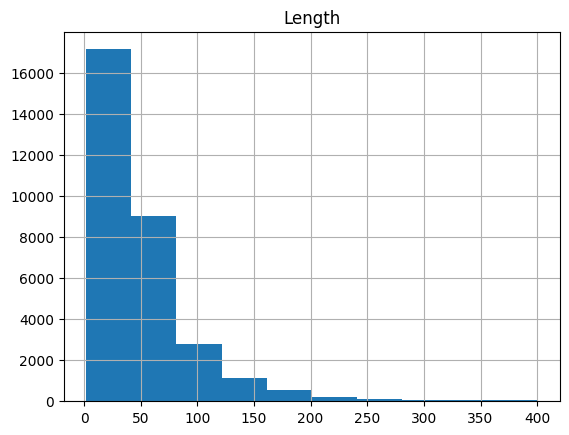

In [64]:
df.loc[df['Length'] <= 400,['Length']].hist()

In [65]:
df['Length'].describe()

count    31347.000000
mean        57.196319
std        158.626280
min          2.000000
25%         23.000000
50%         38.000000
75%         64.000000
max      22753.000000
Name: Length, dtype: float64

In [68]:
df['Length'].quantile([0.25,0.5,0.75,0.9,0.95,0.99])

0.25     23.0
0.50     38.0
0.75     64.0
0.90    106.0
0.95    148.0
0.99    318.0
Name: Length, dtype: float64